In [104]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.stats import multivariate_normal, gaussian_kde, kendalltau, spearmanr, pearsonr
from scipy.integrate import dblquad
from sklearn.metrics import mutual_info_score
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
lee_ferry = pd.read_csv('LeesFerry-monflows-1906-2016.txt', delimiter=' ', header=None)
lee_ferry.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
lee_ferry = lee_ferry.set_index('Year')
lee_ferry

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1906,244314,292534,678174,1204640,3635101,5014167,2950460,1605086,1503159,739807,503006,353312
1907,356760,377349,789130,1465838,2702179,5967232,5103491,1920787,955414,608812,377467,268130
1908,276192,379543,664762,1041224,1595614,2922360,1924283,1117477,598088,483627,395707,312145
1909,378989,317458,763721,1120492,3349297,7203254,4109919,1880422,1526396,680646,489990,377548
1910,289322,493565,1403871,1730475,3298793,3101705,1373125,866631,630999,616468,445769,345922
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,381442,384326,733774,1222586,1362700,1079225,744933,636178,375426,344045,314021,225025
2013,214584,289629,359208,546319,1965060,1964812,874772,727596,1147550,647503,522374,337385
2014,309820,374229,562920,1269132,2932034,3933465,1527985,899893,788861,881584,466760,423745


### 1. Bivariate PDF's
-> The joint distribution of two continuous random variables. 

#### (i) Plot the bivariate normal PDF

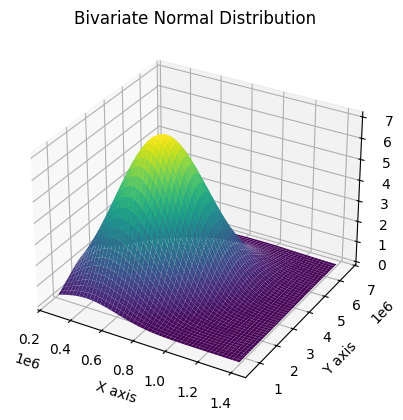

In [3]:
mean_march = float(lee_ferry['Mar'].mean())
mean_may = float(lee_ferry['May'].mean())
march = lee_ferry['Mar'].values
may = lee_ferry['May'].values

mean = [mean_march, mean_may] #mean values of each array
covariance = np.cov(march, may) #variance of each variable and the covariance between them. Covariances should be the same and is the degree to which two variables change together


x = np.linspace(march.min(), march.max(), 1000)
y = np.linspace(may.min(), may.max(), 1000)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv = multivariate_normal(mean, covariance)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis', edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
plt.title('Bivariate Normal Distribution')
plt.show()

#### (ii) Plot the conditional PDF for Y, for X = 0.6 MaF and X = 0.8MaF
-> used to calculate the mean and variance for specific values of one variable, specifically the two given variables of 'X' in this case, and plot 

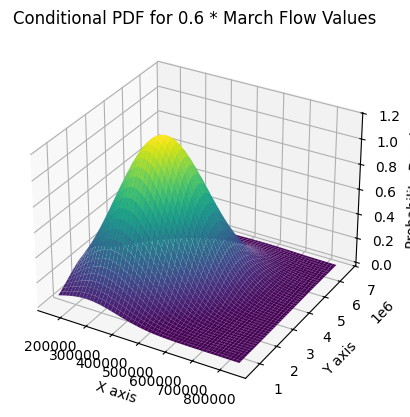

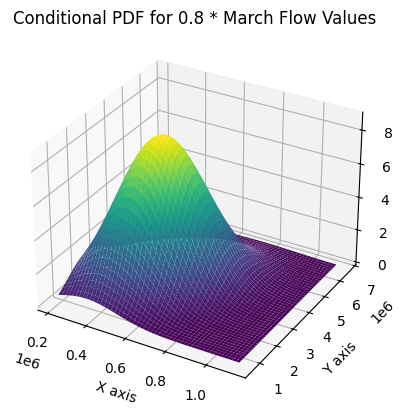

In [4]:
#six____________________________________________________________________
lee_ferry_six = (lee_ferry['Mar'])*(0.6) #manipulate all march values by 0.6
march_six = lee_ferry_six.values
mean_march_six = float(lee_ferry_six.mean())

mean_may = float(lee_ferry['May'].mean())
may = lee_ferry['May'].values

mean1 = [mean_march_six, mean_may] #mean values of each array
covariance_six = np.cov(march_six, may) #variance of each variable and the covariance between them. Covariances should be the same and is the degree to which two variables change together
x1 = np.linspace(march_six.min(), march_six.max(), 1000)
y1 = np.linspace(may.min(), may.max(), 1000)
X1, Y1 = np.meshgrid(x1, y1)
pos1 = np.dstack((X1, Y1))
rv1 = multivariate_normal(mean1, covariance_six)

#Eight___________________________________________________________________
lee_ferry_8 = lee_ferry['Mar']*(0.8)
mean_march_8 = float((lee_ferry_8.mean()))


march_eight = lee_ferry_8.values
may = lee_ferry['May'].values

mean2 = [mean_march_8, mean_may] #mean values of each array
covariance_8 = np.cov(march_eight, may) #variance of each variable and the covariance between them. Covariances should be the same and is the degree to which two variables change together
x2 = np.linspace(march_eight.min(), march_eight.max(), 1000)
y2 = np.linspace(may.min(), may.max(), 1000)
X2, Y2 = np.meshgrid(x2, y2)
pos2 = np.dstack((X2, Y2))
rv2 = multivariate_normal(mean2, covariance_8)



# Plotting
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, Y1, rv1.pdf(pos1), cmap='viridis', edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
plt.title('Conditional PDF for 0.6 * March Flow Values')
plt.show()

plt.figure(2)
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X2, Y2, rv2.pdf(pos2), cmap='viridis', edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
plt.title('Conditional PDF for 0.8 * March Flow Values')

plt.show()


### Repeat (i) and (ii) using KDE
-> KDE's don't assume an underlying distribution 

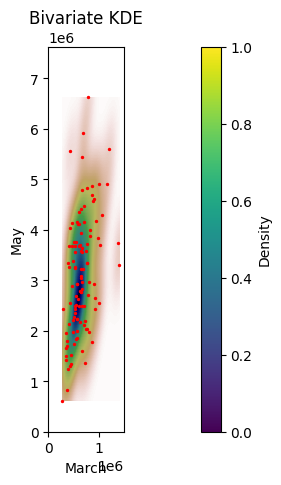

In [5]:
# Sample data
data = np.vstack([march, may])

# Create KDE object
kde = gaussian_kde(data)

# Evaluate the PDF on a grid
x, y = np.mgrid[march.min():march.max():100j, may.min():may.max():100j]
positions = np.vstack([x.ravel(), y.ravel()])
pdf_values = kde(positions).reshape(x.shape)

# Plotting
plt.figure(figsize=(20, 5))
plt.imshow(np.rot90(pdf_values), cmap=plt.cm.gist_earth_r,
           extent=[march.min(), march.max(), may.min(), may.max()])
plt.scatter(data[0], data[1], s=2, color='red')
plt.title('Bivariate KDE')
plt.xlabel('March')
plt.ylabel('May')
plt.colorbar(label='Density')
plt.xlim(0, 1500000)  # Adjust these limits as needed
plt.ylim(0, 7628365)
plt.show()



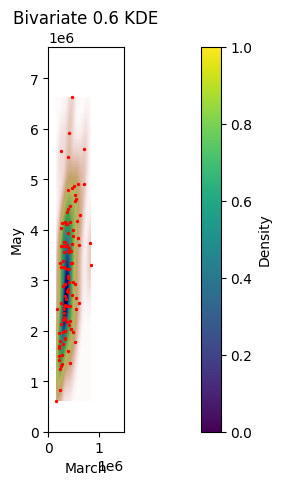

In [6]:
# Sample data
data = np.vstack([march_six, may])

# Create KDE object
kde = gaussian_kde(data)

# Evaluate the PDF on a grid
x, y = np.mgrid[march_six.min():march_six.max():100j, may.min():may.max():100j]
positions = np.vstack([x.ravel(), y.ravel()])
pdf_values = kde(positions).reshape(x.shape)

# Plotting
plt.figure(figsize=(20, 5))
plt.imshow(np.rot90(pdf_values), cmap=plt.cm.gist_earth_r,
           extent=[march_six.min(), march_six.max(), may.min(), may.max()])
plt.scatter(data[0], data[1], s=2, color='red')
plt.title('Bivariate 0.6 KDE')
plt.xlabel('March')
plt.ylabel('May')
plt.colorbar(label='Density')
plt.xlim(0, 1500000)  # Adjust these limits as needed
plt.ylim(0, 7628365)
plt.show()


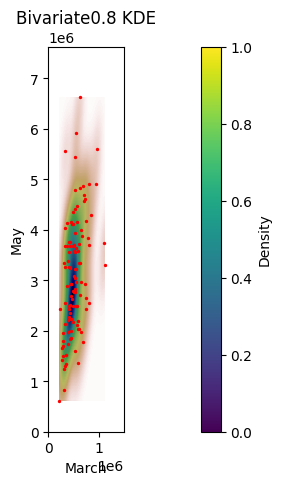

In [7]:
# Sample data
data = np.vstack([march_eight, may])

# Create KDE object
kde = gaussian_kde(data)

# Evaluate the PDF on a grid
x, y = np.mgrid[march_eight.min():march_eight.max():100j, may.min():may.max():100j]
positions = np.vstack([x.ravel(), y.ravel()])
pdf_values = kde(positions).reshape(x.shape)

# Plotting
plt.figure(figsize=(20, 5))
plt.imshow(np.rot90(pdf_values), cmap=plt.cm.gist_earth_r,
           extent=[march_eight.min(), march_eight.max(), may.min(), may.max()])
plt.scatter(data[0], data[1], s=2, color='red')
plt.title('Bivariate0.8 KDE')
plt.xlabel('March')
plt.ylabel('May')
plt.colorbar(label='Density')
plt.xlim(0, 1500000)  # Adjust these limits as needed
plt.ylim(0, 7628365)
plt.show()


In [8]:
lee_ferry_six = (lee_ferry['Mar'])*(0.6) #manipulate all march values by 0.6

### Problem 2: Correlation / Mutual Information

#### (A) Compute the Correlation Coefficient
-> This is the linear relationship between two datasets

In [9]:
may = may
feb = lee_ferry['Feb'].values

correlation, p_value = pearsonr(may, feb)
print('Correlation Coefficient Between May and Feb Streamflows is:', correlation)
print("P value is", p_value)

Correlation Coefficient Between May and Feb Streamflows is: 0.48844740642608747
P value is 5.372790697822264e-08


### (B) Compute Kendall's Tau
-> non-parametric statistic used to measure the ordinal association between two vectors. Close to 1 is strong agreement, close to -1 is strong disagreement

In [10]:
tau, p_value = kendalltau(may, feb)
print("Kendall's Tau:", tau)
print("p-value:", p_value)

Kendall's Tau: 0.33988533988533987
p-value: 1.2372562385727605e-07


### (C) Spearman's Rank Correlation
-> non-parametric statistic measuring the strength and direction of association between two ranked variables. Used for non normal and non linear data. +1 indicates a perfect positive relationship, 0 indicates no relationship, and -1 indicates a perfect negative relationship. 

In [11]:
rho, p_value = spearmanr(may, feb)
print("Spearman's Rank Correlation Coefficient:", rho)
print("p-value:", p_value)

Spearman's Rank Correlation Coefficient: 0.4941119691119691
p-value: 3.5634686601345006e-08


#### Summary: Spearman's Rank Correlation is the best measure of relationship between may and febuary steamflow. These two variables have a positive relationship that is likely slightly non linear

#### (D) (d) Compute the Mutual Information (MI) using Kernel Density Estimators and its significance. Compare with the correlation coefficients above.
-> Measure of the mutual dependence between two variables. KDE's capture complex dependencies, including nonlinear relationships. 

In [12]:


def bootstrap_p_value(x, y, num_permutations=500):
    observed_mi = mutual_info_score(x, y)
    permuted_mi = []

    for _ in range(num_permutations):
        # Permute y to break any association with x
        y_permuted = np.random.permutation(y)
        mi = mutual_info_score(x, y_permuted)
        permuted_mi.append(mi)

    # Calculate p-value
    permuted_mi = np.array(permuted_mi)
    p_value = np.mean(permuted_mi >= observed_mi)

    return observed_mi, p_value

# Example data


# Calculate mutual information and p-value
mi_value, p_value = bootstrap_p_value(feb, may)
print("Mutual Information:", mi_value)
print("P-value:", p_value)


Mutual Information: 4.7095302013123375
P-value: 1.0


#### A mutual independance score of 0 indicated independance. 4.7 indicates a strong relationship and potentially complex / nonlinear. p-value of 1 suggests, however, there is no correlation. If the data is close to linear, as we showed above, then this p value makes sense. The correlation coefficients above, generally, do a better job than a missing information test

### Problem 3: Simple Regression / Robust Regression / Trend Line

In [ ]:
carbon_old = [12.4, 19.5, 23.9, 25.3, 28.2, 31.5, 33.1, 33.4, 38.6]
calcium_old = [20.16, 0.46, 4.18, 28.95, 20.00, 0.57, 1.84, 13.99, 18.02]
carbon_new = [48.9, 52.0, 55.6, 57.7, 58.1, 66.2, 67.1, 71.8]
calcium_new = [16.56, 22.88, 12.64, 14.26, 13.37, 35.22, 24.43, 60.24]
old = pd.DataFrame({'carbon':carbon_old, 'calcium':calcium_old})
new = pd.DataFrame({'carbon':carbon_new, 'calcium':calcium_new})

,carbon,calcium
0,48.9,16.56
1,52.0,22.88
2,55.6,12.64
3,57.7,14.26
4,58.1,13.37
5,66.2,35.22
6,67.1,24.43
7,71.8,60.24


#### (a) Fit a Kendall-Theil Line between calcium (dependant variable) and %carbon (independent variable)

In [26]:
#old 
tau_old, p_value_old = kendalltau(carbon_old, calcium_old)
print('Tau value old:', tau_old)
print('P_value old', p_value_old)
#new
tau_new, p_value_new = kendalltau(carbon_new, calcium_new)
print('Tau value new:', tau_new)
print('P_value new', p_value_new)

Tau value old: 0.0
P_value old 1.0
Tau value new: 0.42857142857142855
P_value new 0.17886904761904762


### (b) Fit a linear regression line and show them with the scatterplot of the data


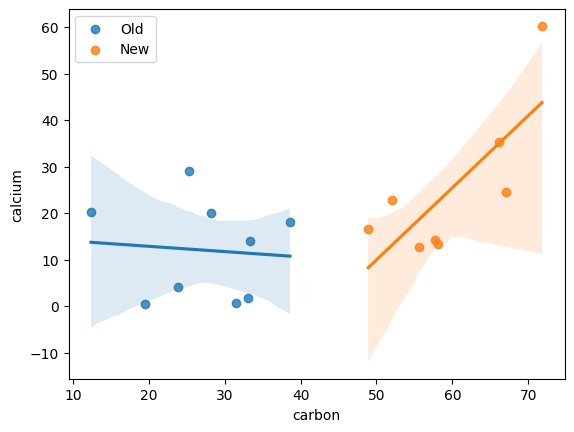

In [34]:
sns.regplot(data = old, x = 'carbon', y='calcium', label='Old')
sns.regplot(data = new, x = 'carbon', y='calcium', label = 'New')
plt.legend()

In [44]:
model_old = smf.ols(formula='calcium ~ carbon', data=old).fit()
print(model_old.summary())


                            OLS Regression Results                            
Dep. Variable:                calcium   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.134
Method:                 Least Squares   F-statistic:                   0.05276
Date:                Tue, 10 Dec 2024   Prob (F-statistic):              0.825
Time:                        10:27:58   Log-Likelihood:                -33.391
No. Observations:                   9   AIC:                             70.78
Df Residuals:                       7   BIC:                             71.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.1178     13.999      1.080      0.3

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [45]:
model_new = smf.ols(formula='calcium ~ carbon', data=new).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                calcium   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     8.411
Date:                Tue, 10 Dec 2024   Prob (F-statistic):             0.0273
Time:                        10:28:00   Log-Likelihood:                -29.568
No. Observations:                   8   AIC:                             63.14
Df Residuals:                       6   BIC:                             63.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.6322     32.169     -2.102      0.0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


### (C) Perform Model Diagnostiscs and Significance Tests and Compare

##### Diagnostics and Significance Tests are part of the above code. Both models, Kendall and Linear, show little to no dependance of calcium on carbon 14 in old groundwater. In new groundwater, however, there is a significant trend given an alpha of 0.05

### Problem 4: Multivariate Regression

In [138]:
AC15 = pd.read_csv('AC15.csv', delimiter=',')
AC15

,LOGTN,LOGCA,LOGIMP,MMJTEMP,MSRAIN,PRES,PNON,PCOMM,PIND
0,2.57292,-0.34672,3.64806,15.30,20.24,48,28,5,19
1,0.78162,-2.32279,4.16044,15.30,20.24,0,0,0,100
2,1.18479,-3.05761,4.21509,15.30,20.24,67,0,33,0
3,1.76130,-1.36258,3.31419,15.30,20.24,55,34,0,10
4,1.18111,-2.14558,3.65066,15.30,20.24,48,0,0,52
5,1.61800,-3.64966,3.36730,24.90,24.66,100,0,0,0
6,2.82932,-3.50656,4.27666,24.90,24.66,84,0,16,0
7,3.85693,-0.79851,4.09434,20.40,23.31,81,6,13,0
8,0.42134,-3.91202,4.59915,11.40,20.31,0,0,100,0
9,1.46187,-2.65926,4.38950,11.40,20.31,30,0,70,0


#### (A) Scatterplot LOGTN with all predictors and apply a smoother to comment on the relationships

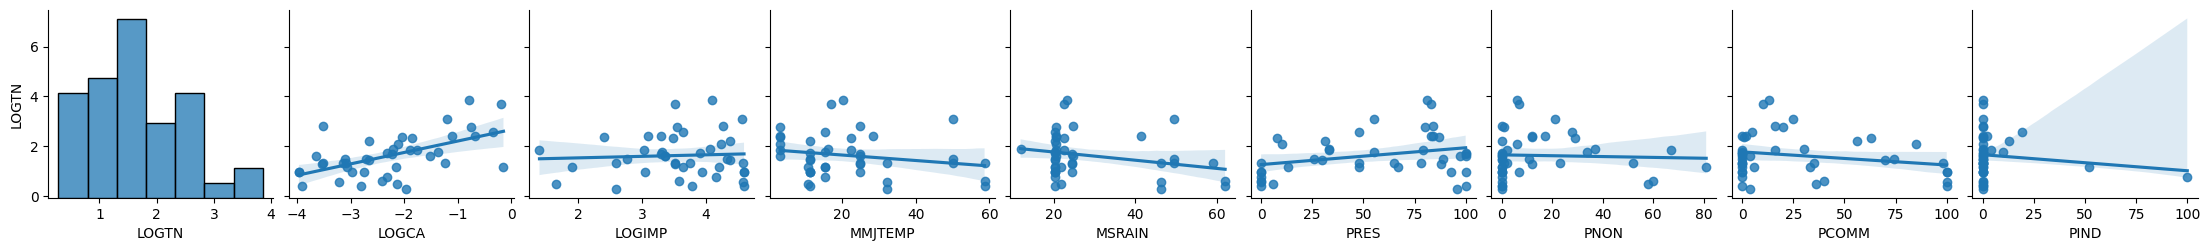

In [ ]:
sns.pairplot(AC15, y_vars = 'LOGTN', kind = 'reg')

##### LOGCA is the only variable that has a linear relationship

#### (B) Using PRESS or AIC or BIC to obtain the best model and perform model diagnostics including ANOVA
->Press, AIC, and BIC are used for model evaluation and selection in regression analysis. We'll use PRESS (predicted residual error sum of squares) because it's similair to what I've done in ML

In [107]:
def press():
    for column in AC15:
        X = np.array(AC15[column])
        X = X.reshape(-1, 1)
        y = np.array(AC15['LOGTN'])
        y = y.reshape(-1, 1)
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        print(' residual sum of squares for', column, 'is : '+ str(np.sum(np.square(y_pred - y))))


In [108]:
press()

 residual sum of squares for LOGTN is : 1.3650991445816728e-30
 residual sum of squares for LOGCA is : 20.358125098933446
 residual sum of squares for LOGIMP is : 29.8211420883146
 residual sum of squares for MMJTEMP is : 28.665847814617777
 residual sum of squares for MSRAIN is : 27.90665378947185
 residual sum of squares for PRES is : 27.333761226417497
 residual sum of squares for PNON is : 29.867314942963556
 residual sum of squares for PCOMM is : 28.501246923409514
 residual sum of squares for PIND is : 29.406820636555892


In [ ]:
def ANOVA():
    for column in AC15:
        predictor = (AC15[column])
        model = ols('LOGTN ~ predictor', data=AC15).fit()
        anova_results = sm.stats.anova_lm(model, typ=2)
        print(column, anova_results)

In [128]:
ANOVA()

LOGTN                  sum_sq    df             F  PR(>F)
predictor  2.992054e+01   1.0  3.530826e+34     0.0
Residual   3.389637e-32  40.0           NaN     NaN
LOGCA               sum_sq    df          F    PR(>F)
predictor   9.562420   1.0  18.788409  0.000096
Residual   20.358125  40.0        NaN       NaN
LOGIMP               sum_sq    df         F    PR(>F)
predictor   0.099403   1.0  0.133332  0.716926
Residual   29.821142  40.0       NaN       NaN
MMJTEMP               sum_sq    df        F    PR(>F)
predictor   1.254697   1.0  1.75079  0.193292
Residual   28.665848  40.0      NaN       NaN
MSRAIN               sum_sq    df        F    PR(>F)
predictor   2.013891   1.0  2.88661  0.097085
Residual   27.906654  40.0      NaN       NaN
PRES               sum_sq    df         F   PR(>F)
predictor   2.586784   1.0  3.785478  0.05875
Residual   27.333761  40.0       NaN      NaN
PNON               sum_sq    df         F    PR(>F)
predictor   0.053230   1.0  0.071288  0.790842
Residua

#### (C) Plot the historical and modeled values with 95% confidence interval along with 1:1 line for visual inspection of the model performance

In [146]:
def press_scatter():
    for column in AC15:
        X = np.array(AC15[column])
        X = X.reshape(-1, 1)
        y = np.array(AC15['LOGTN'])
        y = y.reshape(-1, 1)
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        sns.regplot(x = y, y = y_pred)
        plt.xlabel('Historical')
        plt.ylabel('Predicted')
        plt.title(column)
        plt.show()

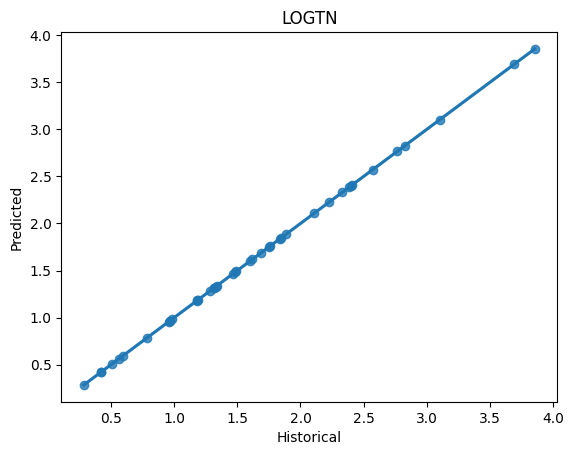

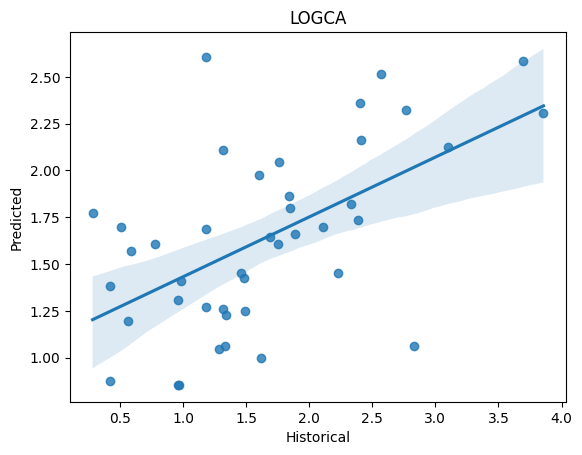

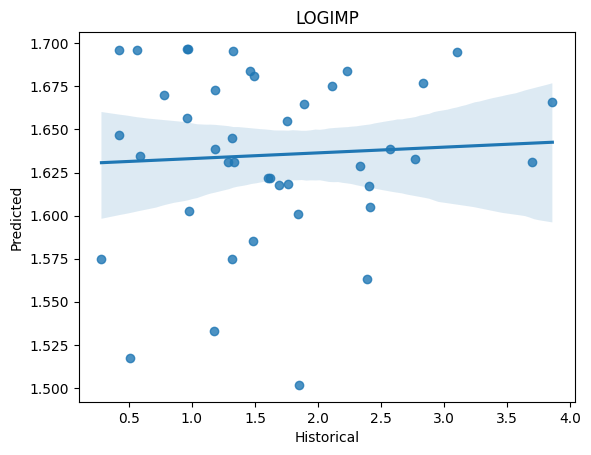

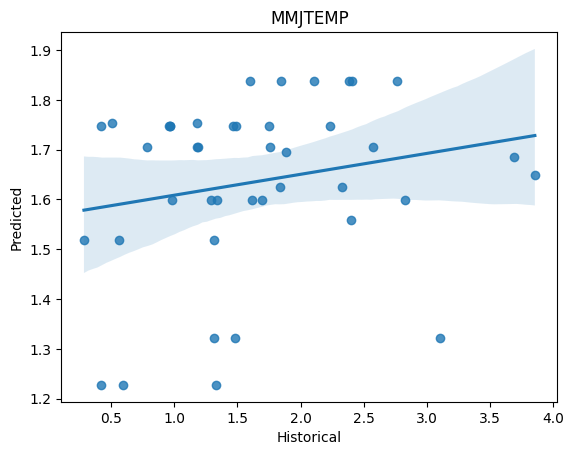

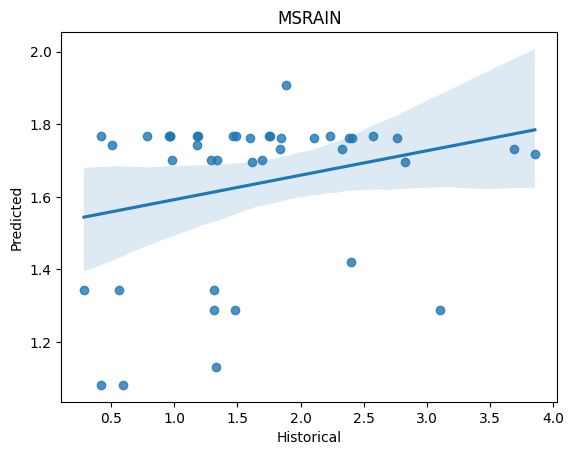

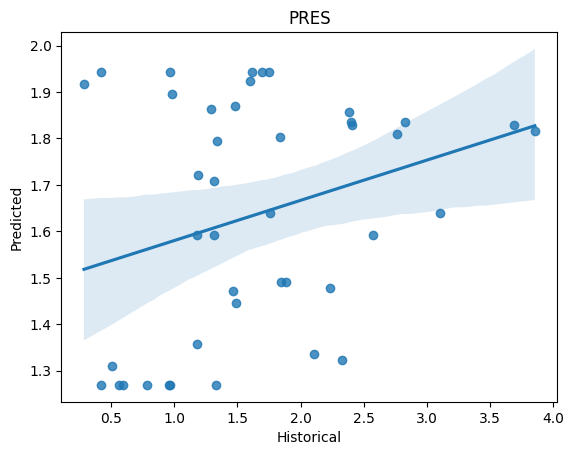

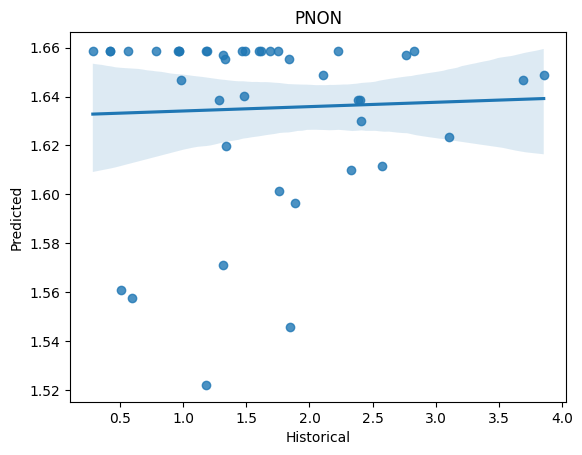

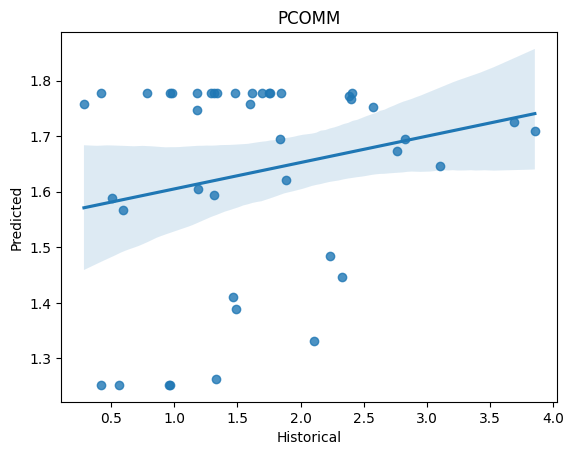

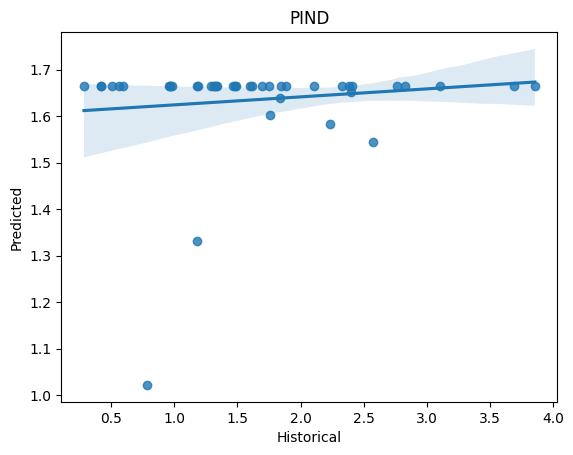

In [147]:
press_scatter()

#### (D) Estimate the Skill of the model by repeatedly dropping 10% of the points - drop 10% of the points, fit the best model to the rest and predict the dropped points; compute skill measured - R and RMSE. Boxplot the skill measures